In [6]:
# for data Analysis
import pandas as pd
import numpy as np

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Data Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Classfier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, homogeneity_score


In [7]:
# Load the data sets
data = pd.read_csv(r"C:\Users\value\Documents\10alytics projects\python\bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
print(data.duplicated().sum())

0


In [10]:
data.shape

(45211, 17)

In [12]:
print(data.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of          age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contac

### Exploratory Analysis

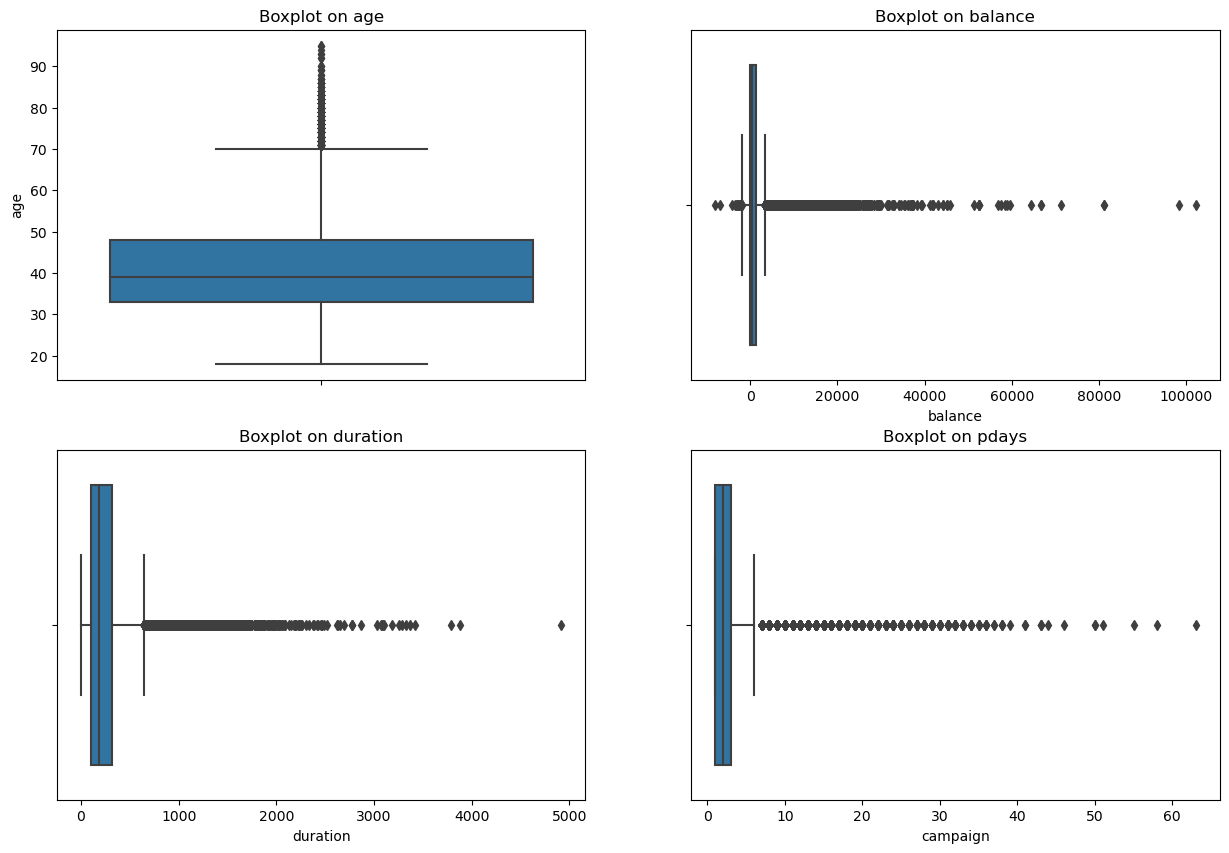

In [41]:
# Checking for outliers

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(y='age', data=data, ax=axs[0,0])
axs[0,0].set_title('Boxplot on age')

sns.boxplot(x='balance', data=data, ax=axs[0,1])
axs[0,1].set_title('Boxplot on balance')

sns.boxplot(x='duration', data=data, ax=axs[1,0])
axs[1,0].set_title('Boxplot on duration')

sns.boxplot(x='campaign', data=data, ax=axs[1,1])
axs[1,1].set_title('Boxplot on pdays');

In [14]:
#Using labelencoder to change all categorical varaible to numerical variable

encoder = LabelEncoder()


for c in data.columns[1:]:
    if (data[c].dtype =='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [15]:
# Creating a copy of data ecluding the label data
data1 = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
label = data[['deposit']]

In [16]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [17]:
label.head()

,deposit
0,0
1,0
2,0
3,0
4,0


In [18]:
data1.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
dtype: object

In [19]:
# numerial statistics
data1.describe().round()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0
mean,41.0,4.0,1.0,1.0,0.0,1362.0,1.0,0.0,1.0,16.0,6.0,258.0,3.0,40.0,1.0,3.0
std,11.0,3.0,1.0,1.0,0.0,3045.0,0.0,0.0,1.0,8.0,3.0,258.0,3.0,100.0,2.0,1.0
min,18.0,0.0,0.0,0.0,0.0,-8019.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0
25%,33.0,1.0,1.0,1.0,0.0,72.0,0.0,0.0,0.0,8.0,3.0,103.0,1.0,-1.0,0.0,3.0
50%,39.0,4.0,1.0,1.0,0.0,448.0,1.0,0.0,0.0,16.0,6.0,180.0,2.0,-1.0,0.0,3.0
75%,48.0,7.0,2.0,2.0,0.0,1428.0,1.0,0.0,2.0,21.0,8.0,319.0,3.0,-1.0,0.0,3.0
max,95.0,11.0,2.0,3.0,1.0,102127.0,1.0,1.0,2.0,31.0,11.0,4918.0,63.0,871.0,275.0,3.0


In [20]:
# dealing with outliers

scaler = MinMaxScaler()
data1['scaled_balance'] = scaler.fit_transform(data1['balance'].values.reshape(-1,1))
data1['scaled_duration'] = scaler.fit_transform(data1['duration'].values.reshape(-1,1))
data1['scaled_pdays'] = scaler.fit_transform(data1['pdays'].values.reshape(-1,1))
data1['scaled_previous'] = scaler.fit_transform(data1['previous'].values.reshape(-1,1))
data1['scaled_campaign'] = scaler.fit_transform(data1['campaign'].values.reshape(-1,1))


data1.drop(['balance', 'duration','pdays','previous','campaign'], axis=1, inplace=True)

data1.head()

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,scaled_balance,scaled_duration,scaled_pdays,scaled_previous,scaled_campaign
0,58,4,1,2,0,1,0,2,5,8,3,0.092259,0.053070,0.0,0.0,0.0
1,44,9,2,1,0,1,0,2,5,8,3,0.073067,0.030704,0.0,0.0,0.0
2,33,2,1,1,0,1,1,2,5,8,3,0.072822,0.015453,0.0,0.0,0.0
3,47,1,1,3,0,1,0,2,5,8,3,0.086476,0.018707,0.0,0.0,0.0
4,33,11,2,3,0,0,0,2,5,8,3,0.072812,0.040260,0.0,0.0,0.0


In [21]:
# spliting the dataset into train and test sets
# X = questions Y= answers 80% train dataset 20% test

X_train, X_test, y_train, y_test = train_test_split(data1, label, test_size=0.2, random_state=42)


In [22]:
X_train.head()


,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,scaled_balance,scaled_duration,scaled_pdays,scaled_previous,scaled_campaign
3344,41,1,1,0,0,1,0,2,15,8,3,0.080511,0.014640,0.0,0.0,0.000000
17965,49,9,1,0,0,1,0,0,30,5,3,0.085650,0.054697,0.0,0.0,0.016129
18299,42,0,1,1,0,0,0,0,31,5,3,0.107684,0.026434,0.0,0.0,0.048387
10221,37,4,2,2,0,1,0,2,11,6,3,0.071723,0.076251,0.0,0.0,0.161290
32192,56,1,1,0,0,0,0,0,15,0,3,0.104561,0.053680,0.0,0.0,0.016129


In [23]:
y_train.head()

,deposit
3344,0
17965,0
18299,0
10221,0
32192,1


In [24]:
# 8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbor'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression'],
    
            ]

In [25]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = f1_score(y_test, pred)
    
    # a_score = roc_auc_score(y_test, rfy_pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')


In [26]:
acc_list

{'XGB Classifier': ['90.78%'],
 'Random Forest': ['90.06%'],
 'K-Nearest Neighbor': ['87.6%'],
 'SGD Classifier': ['88.06%'],
 'SVC': ['87.94%'],
 'Naive Bayes': ['82.48%'],
 'Decision Tree': ['87.36%'],
 'Logistic Regression': ['88.36%']}

In [27]:
precision_list

{'XGB Classifier': ['65.77%'],
 'Random Forest': ['63.45%'],
 'K-Nearest Neighbor': ['45.25%'],
 'SGD Classifier': ['64.1%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['34.27%'],
 'Decision Tree': ['47.61%'],
 'Logistic Regression': ['58.8%']}

In [28]:
recall_list

{'XGB Classifier': ['49.13%'],
 'Random Forest': ['41.52%'],
 'K-Nearest Neighbor': ['13.11%'],
 'SGD Classifier': ['2.29%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['49.22%'],
 'Decision Tree': ['47.57%'],
 'Logistic Regression': ['11.64%']}

In [29]:
roc_list

{'XGB Classifier': ['56.24%'],
 'Random Forest': ['50.19%'],
 'K-Nearest Neighbor': ['20.33%'],
 'SGD Classifier': ['4.42%'],
 'SVC': ['0.0%'],
 'Naive Bayes': ['40.41%'],
 'Decision Tree': ['47.59%'],
 'Logistic Regression': ['19.43%']}

In [30]:
# Model Building 
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy', accuracy_score(y_test, rfy_pred))
print('Precision', precision_score(y_test, rfy_pred))
print('Recall', recall_score(y_test, rfy_pred))
print('F1-score', f1_score(y_test, rfy_pred))
print('AUC-ROC', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy 0.9015813336282207
Precision 0.6401673640167364
Recall 0.42071494042163154
F1-score 0.5077433628318584
AUC-ROC 0.6941351362067917


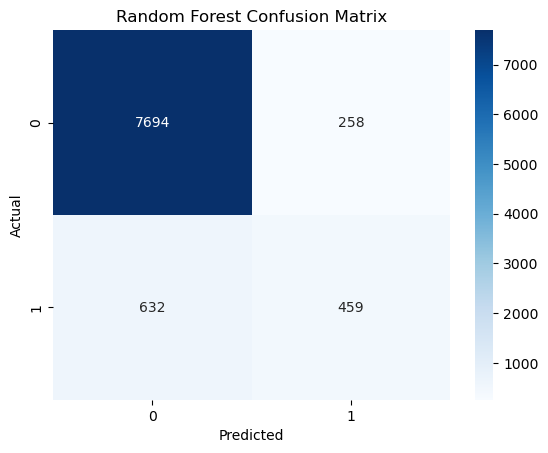

In [31]:
# create a confusion Matrix for random forest
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [32]:
# Model Building 
# XGBoost Classifier

xbc = XGBClassifier()

xbc.fit(X_train, y_train)

xbc_pred = xbc.predict(X_test)

print('XGB Classifier')
print('Accuracy', accuracy_score(y_test, xbc_pred))
print('Precision', precision_score(y_test, xbc_pred))
print('Recall', recall_score(y_test, xbc_pred))
print('F1-score', f1_score(y_test, xbc_pred))
print('AUC-ROC', roc_auc_score(y_test, xbc_pred))

XGB Classifier
Accuracy 0.9077739688156585
Precision 0.6576687116564417
Recall 0.4912923923006416
F1-score 0.5624344176285414
AUC-ROC 0.7281034396110854


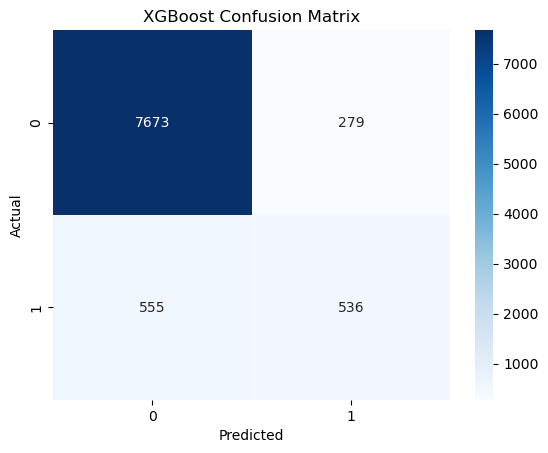

In [37]:
# create a confusion Matrix for XGBoost Classifier
xbc = confusion_matrix(y_test, xbc_pred)

# Visualize the confusion matrix
sns.heatmap(xbc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [35]:
# Model Building 
# Logistics Regression

lrc = LogisticRegression()

lrc.fit(X_train, y_train)

lrc_pred = lrc.predict(X_test)

print('Logistics Regression')
print('Accuracy', accuracy_score(y_test, lrc_pred))
print('Precision', precision_score(y_test, lrc_pred))
print('Recall', recall_score(y_test, lrc_pred))
print('F1-score', f1_score(y_test, lrc_pred))
print('AUC-ROC', roc_auc_score(y_test, lrc_pred))

Logistics Regression
Accuracy 0.8835563419219286
Precision 0.5879629629629629
Recall 0.11640696608615948
F1-score 0.1943381790359602
AUC-ROC 0.5526074065843272


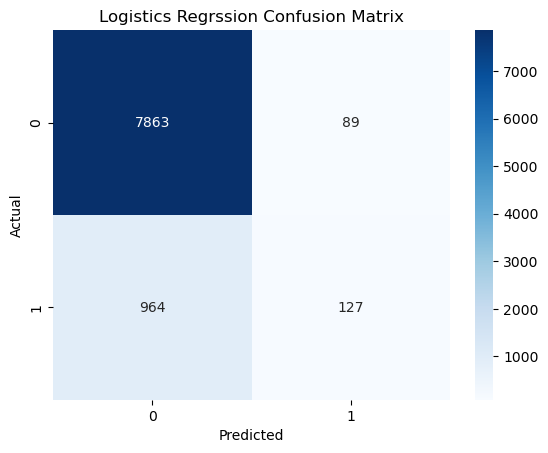

In [38]:
# create a confusion Matrix for logistics Regression
lrc = confusion_matrix(y_test, lrc_pred)

# Visualize the confusion matrix
sns.heatmap(lrc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistics Regrssion Confusion Matrix')
plt.show()